<a href="https://colab.research.google.com/github/Shiwei-Chen/ISTM-660/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction:
Cluster analysis is a multivariate statistical technique that groups observations on the basis of features or variables they are described by.
Was that too boring ok let's try to understand this with an example.
In the example given below there two figure, one on the left side has three clusters and this is done on the basis of geographic proximity, the first cluster shows the countries in North America and the second and third cluster shows the countries in Europe and Australia respectively.
In the figure to the right, the clustering is done on the basis of the official language of the country.
In simple terms we can understand this as observations in a dataset is divided
into different groups and this is very useful.

K-Means Algorithm:

The algorithm is very simple given data we first initialize seeds randomly. Then we go on calculating the euclidean distance of every point with every seeds. The one with the minimum distance becomes the part of the given seed. After each and every data is covered we place the seeds into the centroid of the clusters formed. And now that centroid is the representative of that cluster.

When to use Cluster Analysis?
This is one of the decision we have to take while dealing with problems. Taking decision is not a tedious task as it solely depends upon the type of data we are using. If we are using a labeled data we can use classification technique whereas in case when the data is not labeled we can cluster the data based on certain feature and try to label it on our own.
So when we use cluster analysis we don’t have labels(ie..data is not labeled)
in the context of machine learning this is called as unsupervised learning.

Final Goal:
The goal of clustering is to maximize the similarity of observation within the cluster and maximize the dissimilarity between the clusters.
We will be achieving this goal very soon. Let’s dive into it.

In [0]:
from sklearn.cluster import KMeans


Data Set Information:

This is the dataset for avocado price and sales. There are two types of avocado, organic and conventional, base on other data such as average price, total bags sold, and etc. We can do the clustering to see whether the avocado is conventional or organic. 

In [0]:
url = 'https://raw.githubusercontent.com/Shiwei-Chen/ISTM-660/master/avocado.csv'
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Load data into a pandas dataframe
avocado = pd.read_csv(url)

# Print first 5 rows of the dataframe
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [0]:
avocado2 = avocado[['AveragePrice', 'Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags','year','type']]
avocado = avocado2
avocado.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,2015,conventional
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,2015,conventional
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,2015,conventional
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,2015,conventional
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,2015,conventional


In [0]:
null_count = avocado.isnull().sum()
null_count

AveragePrice    0
Total Volume    0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
year            0
type            0
dtype: int64

In [0]:
re_name ={'Total Volume':'Total_Volume', 'Total Bags':'Total_Bags','Small Bags':'Small_Bags','Large Bags':'Large_Bags','XLarge Bags':'XLarge_Bags'}
avocado.rename(columns=re_name, inplace = True)
avocado.head()

,AveragePrice,Total_Volume,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,year,type
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,2015,conventional
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,2015,conventional
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,2015,conventional
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,2015,conventional
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,2015,conventional


In [0]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test = train_test_split(avocado, test_size=0.1) # 90% training and 10% test

In [0]:
X_train

,AveragePrice,Total_Volume,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,year,type
2546,1.29,164917.61,44511.92,44509.70,2.22,0.00,2015,conventional
17173,1.12,104656.52,69610.70,63084.50,6526.20,0.00,2017,organic
18012,1.41,13219.33,12153.91,12153.91,0.00,0.00,2018,organic
17254,2.38,3374.92,1627.58,587.08,1040.50,0.00,2017,organic
16826,2.17,6628.13,4242.46,3087.88,1154.58,0.00,2017,organic
...,...,...,...,...,...,...,...,...
4447,0.97,454278.32,116438.74,52416.59,52961.59,11060.56,2016,conventional
563,1.03,136795.35,19375.08,13297.29,1837.60,4240.19,2015,conventional
16606,1.96,56614.23,40841.17,26362.82,14478.35,0.00,2017,organic
11829,1.46,612910.15,158641.83,115068.71,43573.12,0.00,2015,organic


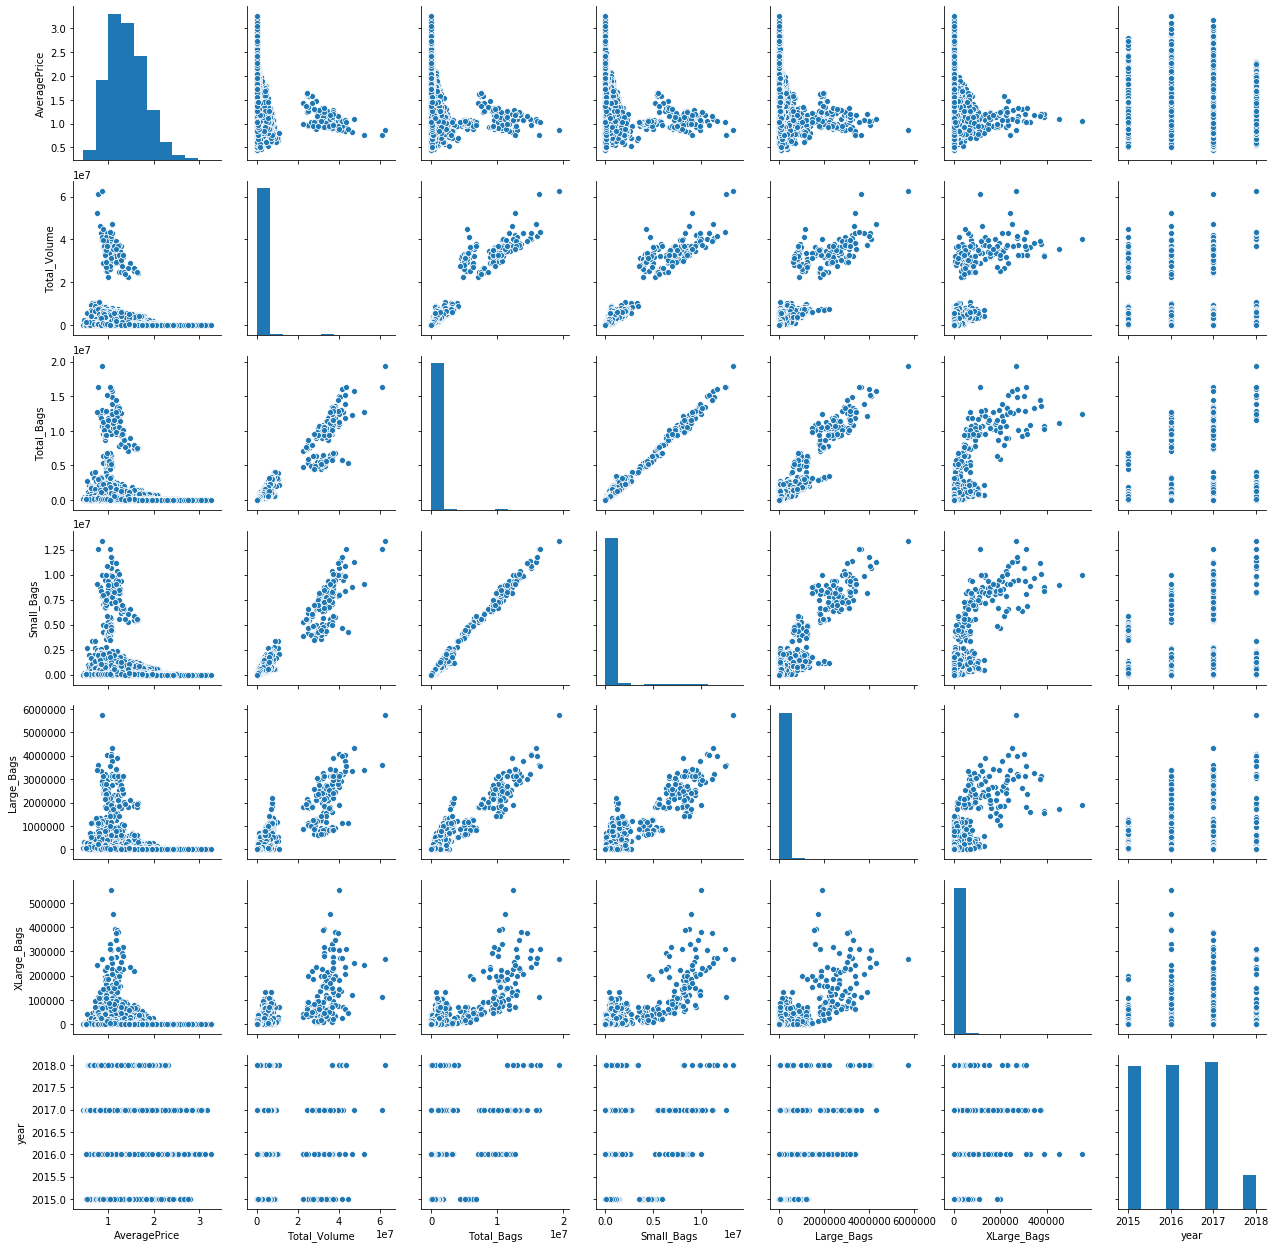

In [0]:
import seaborn as sns
g = sns.pairplot(X_train)

Choose the data that have less correlation.

Text(0, 0.5, 'Large_Bags')

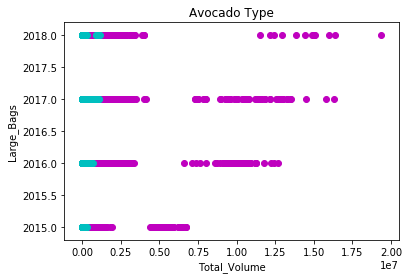

In [0]:
colors = {'conventional':'m', 'organic':'c'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(avocado['Total_Bags'])):
  ax.scatter(avocado['Total_Bags'][i], avocado['year'][i],color=colors[avocado['type'][i]])
# set a title and labels
ax.set_title('Avocado Type')
ax.set_xlabel('Total_Volume')
ax.set_ylabel('Large_Bags')

In [0]:
avocado2 = avocado.drop(['type'], axis = 1)
x = avocado2.copy()

kmeans = KMeans(2)

kmeans.fit(x)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
avocado3 = avocado
avocado3['Kmeanpredict'] = kmeans.fit_predict(x)

In [0]:
avocado3.tail(90)

,AveragePrice,Total_Volume,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,year,type,Kmeanpredict
18159,1.46,103704.87,84899.52,73615.54,11283.98,0.0,2018,organic,0
18160,1.44,96702.50,78166.62,72587.74,5578.88,0.0,2018,organic,0
18161,1.55,103243.02,79946.32,63894.49,16051.83,0.0,2018,organic,0
18162,1.48,105688.73,87864.78,71192.79,16671.99,0.0,2018,organic,0
18163,1.42,106345.74,88536.88,78949.63,9587.25,0.0,2018,organic,0
...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,13066.82,431.85,0.0,2018,organic,0
18245,1.71,13888.04,9264.84,8940.04,324.80,0.0,2018,organic,0
18246,1.87,13766.76,9394.11,9351.80,42.31,0.0,2018,organic,0
18247,1.93,16205.22,10969.54,10919.54,50.00,0.0,2018,organic,0


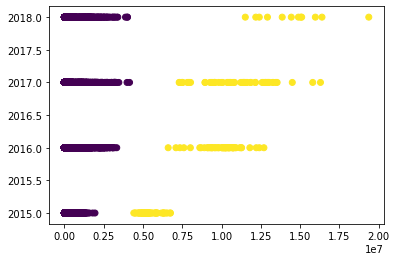

In [0]:
import matplotlib.pyplot as plt
plt.scatter(avocado3['Total_Bags'], avocado3['year'],c=avocado3['Kmeanpredict'])

In [0]:
avocado3['predict'] = avocado3['Kmeanpredict']

for i in range(len(avocado3['type'])):
    if avocado3['type'][i] == 'conventional':
      avocado3['predict'][i] = 0
    elif avocado3['type'][i] == 'organic':
      avocado3['predict'][i] = 1 

avocado3      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,AveragePrice,Total_Volume,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,year,type,Kmeanpredict,predict
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,2015,conventional,0,0
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,2015,conventional,0,0
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,2015,conventional,0,0
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,2015,conventional,0,0
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,2015,conventional,0,0
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,13066.82,431.85,0.0,2018,organic,0,1
18245,1.71,13888.04,9264.84,8940.04,324.80,0.0,2018,organic,0,1
18246,1.87,13766.76,9394.11,9351.80,42.31,0.0,2018,organic,0,1
18247,1.93,16205.22,10969.54,10919.54,50.00,0.0,2018,organic,0,1


In [0]:
error = 0
total = len(avocado3['type'])
for i in range(len(avocado3['type'])):
  if avocado3['Kmeanpredict'][i] != avocado3['predict'][i]:
    error += 1

predictionrate = 100*((total-error)/total)
print('prediction rate is', predictionrate,'%, which means in this dataset clustering agreed with classified data in ', predictionrate,'% of the time')

prediction rate is 49.08214148720478 %, which means in this dataset clustering agreed with classified data in  49.08214148720478 % of the time
